This is the Bates and Li (1997, Atmos.-Ocean.) polar vortex test case. This starts with a stable polar vortex which is perturbed by a slowly-growing mountain, and observes the resulting vorticial structures. (The "growing mountain" sounds weird but is a quite useful way of studying the impact of mountains on the flow without creating shocks or imbalances.)

In [1]:
import xarray as xa
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm, colors
import cartopy.crs as ccrs
import colorsys
import dask #Chunking will be necessary for the larger datasets

In [2]:
large = 24; med = 20; small = 16
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (8, 4),
          'axes.labelsize': med,
          'axes.titlesize': large,
          'xtick.labelsize': small,
          'ytick.labelsize': small,
          'figure.titlesize': large,
          'axes.titlepad': 6}
plt.rcParams.update(params)

In [3]:
infile96="/archive/lmh/SHiELD/202103/C96.BLvortex/history/0000000000/atmos_daily.nc"
da96=xa.open_dataset(infile96,decode_times=False,chunks={'time': 1}).squeeze() #xarray is confused by solo_core's NO_CALENDAR

infile192="/archive/lmh/SHiELD/202103/C192.BLvortex/history/0000000000/atmos_daily.nc"
da192=xa.open_dataset(infile192,decode_times=False,chunks={'time': 1}).squeeze() #xarray is confused by solo_core's NO_CALENDAR

infile384="/archive/lmh/SHiELD/202103/C384.BLvortex/history/0000000000/atmos_daily.nc"
da384=xa.open_dataset(infile384,decode_times=False,chunks={'time': 1}).squeeze() #xarray is confused by solo_core's NO_CALENDAR


In [4]:
#North Polar Projection
projection=ccrs.NorthPolarStereo(0, 90)

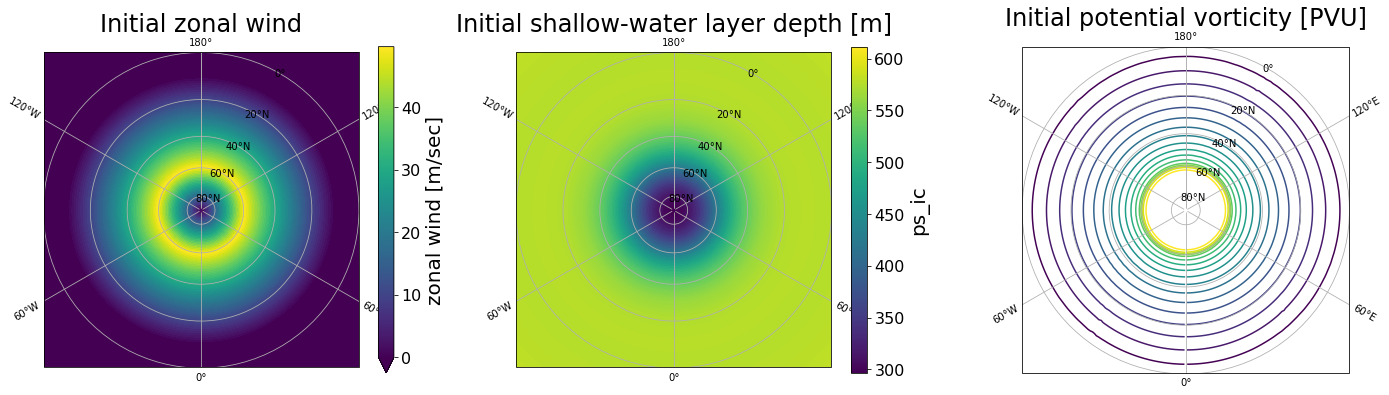

In [5]:
fig = plt.figure(figsize=(24,6))
gs = fig.add_gridspec(1,3)

ax = fig.add_subplot(gs[0],projection=projection)
da96.ua_ic.plot(transform=ccrs.PlateCarree(),vmin=0)
ax.set_title("Initial zonal wind")
ax.gridlines(draw_labels=True, y_inline=True)
ax.set_extent([-180, 180, 0, 90], ccrs.PlateCarree())
    
ax = fig.add_subplot(gs[1],projection=projection)
(da96.ps_ic/9.81).plot(transform=ccrs.PlateCarree())
ax.set_title("Initial shallow-water layer depth [m]")
ax.gridlines(draw_labels=True, y_inline=True)
ax.set_extent([-180, 180, 0, 90], ccrs.PlateCarree())

ax = fig.add_subplot(gs[2],projection=projection)
(da96.pv.isel(time=0)*1.e6).plot.contour(transform=ccrs.PlateCarree(),  vmin=0.0, levels=np.arange(0,0.041,0.0025))
ax.set_title("Initial potential vorticity [PVU]")
ax.gridlines(draw_labels=True, y_inline=True)
ax.set_extent([-180, 180, 0, 90], ccrs.PlateCarree())



The topography itself is a wavenumber-1 feature which slowly rises from days 0 to 4, remains steady until day 16, and then oscillates over the next eight days to force another response.

In [6]:
zsurf = da96.zsurf.sel(time=(2,4,10,14,16,18,20,22,24))
p=zsurf.plot.contourf(col="time", col_wrap=3, subplot_kws=dict(projection=projection),transform=ccrs.PlateCarree(), )
for ax in p.axes.flat:
    ax.gridlines()
    ax.set_extent([-180, 180, 0, 90],ccrs.PlateCarree())

We plot PV contours for the C96 (100 km) simulations. We focus on the last 12 days of the simulation period, when intense gradients start to form. Even at this very coarse resolution very sharp gradients are maintained in this solver. Note also the appearance of barotropic vortices, especially in the last few days when the quick oscillation of the topography re-disrupts the vortex.

We use contours (interval of 0.0025 PVU) here to make the gradients more apparent: we also do not plot PVs larger than 0.04 PVU (which is mostly the original displaced polar air mass). The contouring is the same as in the PV ICs shown above.

In [15]:
tt=range(14, 25, 2)
pv = da96.pv.sel(time=tt)*1.e6
p=pv.plot.contour(x="lon", y="lat", col="time", col_wrap=3, figsize=(20,12), subplot_kws=dict(projection=projection),transform=ccrs.PlateCarree(), vmin=0.0, levels=np.arange(0,0.041,0.0025))
for ax, n in zip(p.axes.flat,tt):
    #da96.zsurf.sel(time=n).plot.contour(colors='k',ax=ax,levels=(-750,-500,-250,250,500,750))#Unfortunately doesn't work
    ax.gridlines(draw_labels=True, y_inline=True)
    ax.set_extent([-180, 180, 0, 90],ccrs.PlateCarree())
plt.subplots_adjust(hspace=0.15) #tight_layout doesn't work

We can compare to C384 (25 km). The gross features are the same but the gradients are significantly sharper, as we expect.

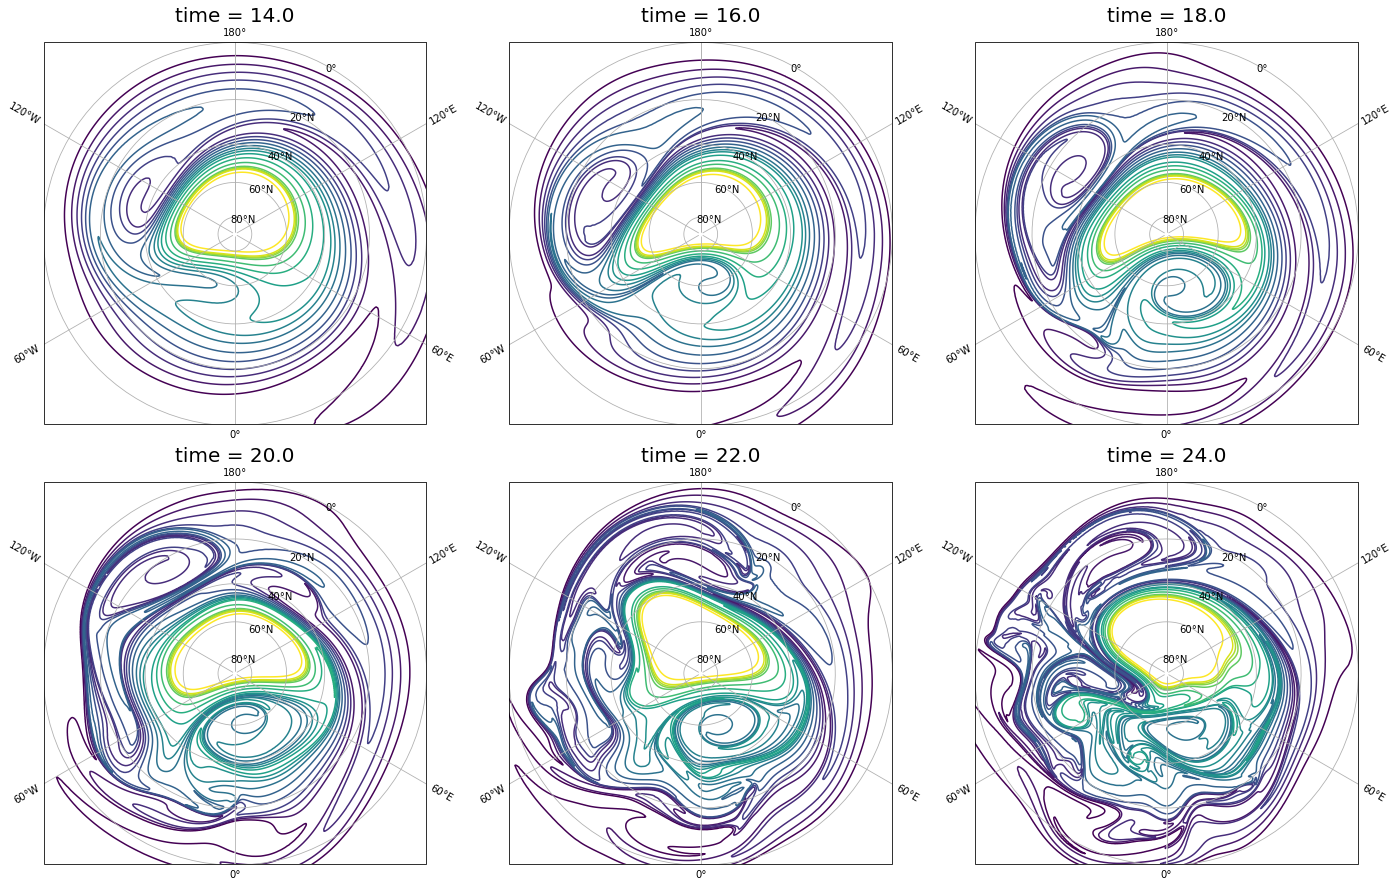

In [16]:
pv = da384.pv.sel(time=slice(14, 25, 2))*1.e6
p=pv.plot.contour(x="lon", y="lat", col="time", col_wrap=3, figsize=(20,12), subplot_kws=dict(projection=projection),transform=ccrs.PlateCarree(), vmin=0.0, levels=np.arange(0,0.041,0.0025))
for ax in p.axes.flat:
    ax.gridlines(draw_labels=True, y_inline=True)
    ax.set_extent([-180, 180, 0, 90],ccrs.PlateCarree())
plt.subplots_adjust(hspace=0.15) #tight_layout doesn't work

We examine convergence across resolutions. Again the gross features are the same but smaller-scale fronts are much better represented at higher resolution

In [9]:
fig = plt.figure(figsize=(24,10))
gs = fig.add_gridspec(1,3)

ax = fig.add_subplot(gs[0],projection=projection)
pv = da96.pv.sel(time=24)*1.e6
pv.plot.contour(transform=ccrs.PlateCarree(), vmin=0.0, levels=np.arange(0,0.041,0.0025))
ax.gridlines(draw_labels=True, y_inline=True)
ax.set_extent([-180, 180, 0, 90],ccrs.PlateCarree())
ax.set_title("C96")

ax = fig.add_subplot(gs[1],projection=projection)
pv = da192.pv.sel(time=24)*1.e6
pv.plot.contour(transform=ccrs.PlateCarree(), vmin=0.0, levels=np.arange(0,0.041,0.0025))
ax.gridlines(draw_labels=True, y_inline=True)
ax.set_extent([-180, 180, 0, 90],ccrs.PlateCarree())
ax.set_title("C192")


ax = fig.add_subplot(gs[2],projection=projection)
pv = da384.pv.sel(time=24)*1.e6
pv.plot.contour(transform=ccrs.PlateCarree(), vmin=0.0, levels=np.arange(0,0.041,0.0025))
ax.gridlines(draw_labels=True, y_inline=True)
ax.set_extent([-180, 180, 0, 90],ccrs.PlateCarree())
ax.set_title("C384");